In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

## Seaborn and Correlation Matrix

Today we are going to load seaborn and make on of their plots.  They have some nice plots and it is becoming mainstream.  https://seaborn.pydata.org/examples/index.html

First see if you have it.  Type
import seaborn as sns

If not to install there are two ways. First I am going to try the new way.
* Open Anaconda Navigator
* goto environments
* where is says installed click not installed or all
* search for seaborn and check it.

If that doesn't work we can do it in the terminal.  
* open a new terminal window
* googel conda install seaborn
* open the page
* copy the "conda install -c anaconda seaborn"
* paste into temrinal and run

If those all fail find me.

## Read in our well data

In [2]:
df=pd.read_csv('well_data.csv')

List all the columns

In [3]:
df.columns

Index(['Well_ID', 'Lat', 'Lon', 'Depth', 'Drink', 'Si', 'P', 'S', 'Ca', 'Fe',
       'Ba', 'Na', 'Mg', 'K', 'Mn', 'As', 'Sr', 'F', 'Cl', 'SO4', 'Br'],
      dtype='object')

If you ever need to delete a column this is how you do it.   (not needed)

In [4]:
df = df.drop(['Well_ID','Drink'], axis=1)

Go back and find the columns you want to use and save it back to the dataframe.  

In [6]:
df=df[['As', 'Sr', 'Ca', 'P', 'Fe']]

Run seaborn pairplot. https://seaborn.pydata.org/generated/seaborn.pairplot.html

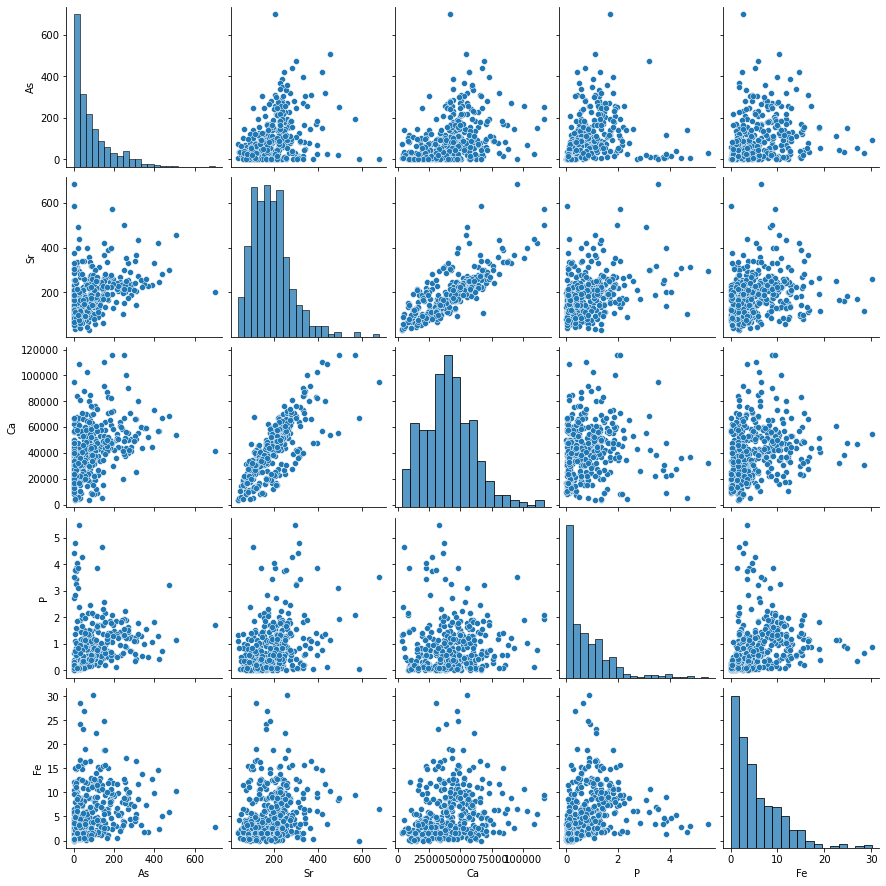

In [7]:
sns.pairplot(df)
plt.savefig('test.jpg')

Also you can color by a categorical value.  So add 'Drink' back in and use it to set hue

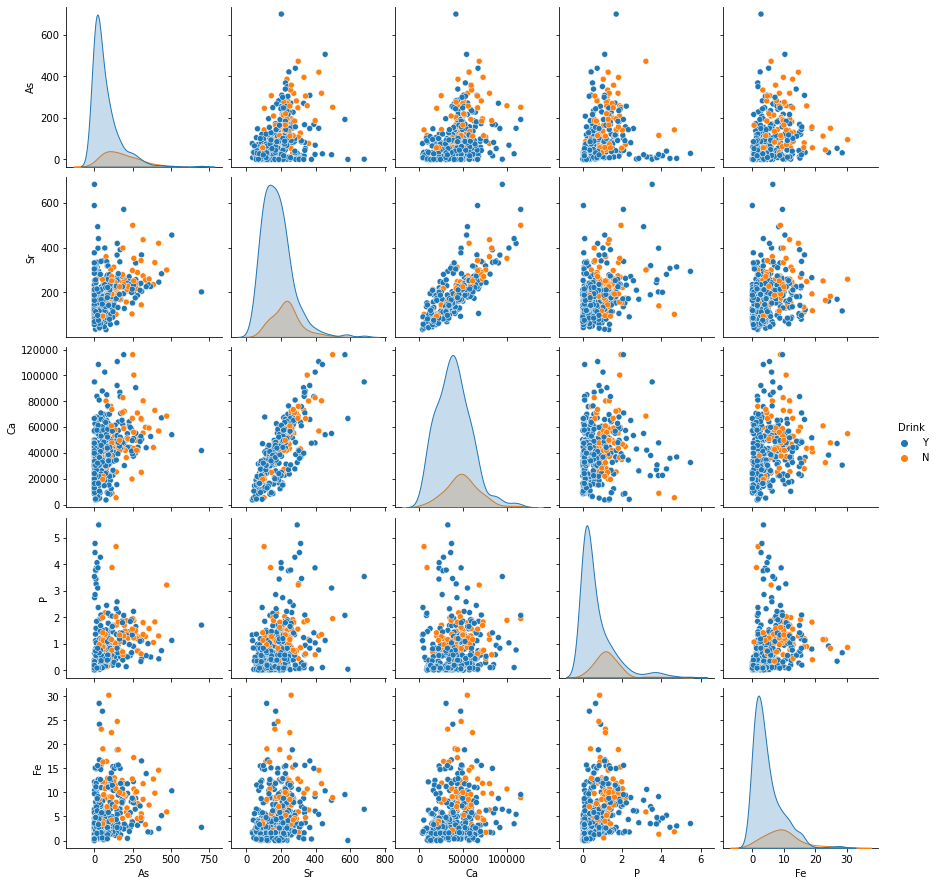

In [8]:
df=pd.read_csv('well_data.csv')
df=df[['As', 'Sr', 'Ca', 'P', 'Fe','Drink']]
sns.pairplot(df,hue='Drink')
plt.savefig('test.jpg')

### If it is easier you could do it by column number instead

In [14]:
df=pd.read_csv('well_data.csv')

In [15]:
for count,col in enumerate(df):
    print(count,col)

0 Well_ID
1 Lat
2 Lon
3 Depth
4 Drink
5 Si
6 P
7 S
8 Ca
9 Fe
10 Ba
11 Na
12 Mg
13 K
14 Mn
15 As
16 Sr
17 F
18 Cl
19 SO4
20 Br


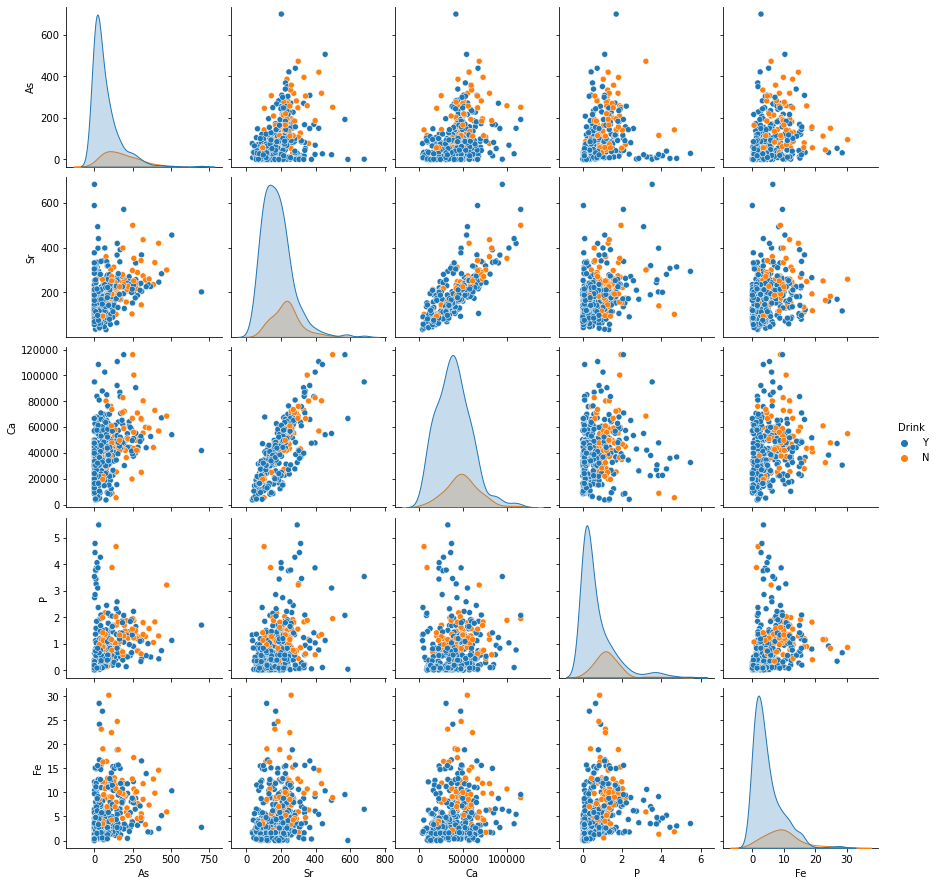

In [18]:

df=df.iloc[:,[15, 16, 8, 6, 9,4]]
sns.pairplot(df,hue='Drink')
plt.savefig('test.jpg')

## This is all extra material below that I found fun

But you don't get all the r-values or p-values.  Can you make an excel file of all of them?  I would
1.  Just take all the numerical data.  See first line for how I did it.
1.  Make a double for loop to go through the data
1.  Calculate the r2
1.  print to your new dataframe
1.  save to excel

In [16]:
df=df_well_data.select_dtypes(include=np.number)
df_r2=pd.DataFrame()

for i in df:
    for j in df:
        print (i,j)
        results=stats.linregress(df_well_data[[i,j]].dropna())
        df_r2.at[j,i]=results.rvalue**2
        
df_r2.to_excel('All_correlations.xlsx')

Well_ID Well_ID
Well_ID Lat
Well_ID Lon
Well_ID Depth
Well_ID Si
Well_ID P
Well_ID S
Well_ID Ca
Well_ID Fe
Well_ID Ba
Well_ID Na
Well_ID Mg
Well_ID K
Well_ID Mn
Well_ID As
Well_ID Sr
Well_ID F
Well_ID Cl
Well_ID SO4
Well_ID Br
Lat Well_ID
Lat Lat
Lat Lon
Lat Depth
Lat Si
Lat P
Lat S
Lat Ca
Lat Fe
Lat Ba
Lat Na
Lat Mg
Lat K
Lat Mn
Lat As
Lat Sr
Lat F
Lat Cl
Lat SO4
Lat Br
Lon Well_ID
Lon Lat
Lon Lon
Lon Depth
Lon Si
Lon P
Lon S
Lon Ca
Lon Fe
Lon Ba
Lon Na
Lon Mg
Lon K
Lon Mn
Lon As
Lon Sr
Lon F
Lon Cl
Lon SO4
Lon Br
Depth Well_ID
Depth Lat
Depth Lon
Depth Depth
Depth Si
Depth P
Depth S
Depth Ca
Depth Fe
Depth Ba
Depth Na
Depth Mg
Depth K
Depth Mn
Depth As
Depth Sr
Depth F
Depth Cl
Depth SO4
Depth Br
Si Well_ID
Si Lat
Si Lon
Si Depth
Si Si
Si P
Si S
Si Ca
Si Fe
Si Ba
Si Na
Si Mg
Si K
Si Mn
Si As
Si Sr
Si F
Si Cl
Si SO4
Si Br
P Well_ID
P Lat
P Lon
P Depth
P Si
P P
P S
P Ca
P Fe
P Ba
P Na
P Mg
P K
P Mn
P As
P Sr
P F
P Cl
P SO4
P Br
S Well_ID
S Lat
S Lon
S Depth
S Si
S P
S S
S Ca
S Fe
S Ba


You can open your excel file or visualize in sseaborn. 

<AxesSubplot:>

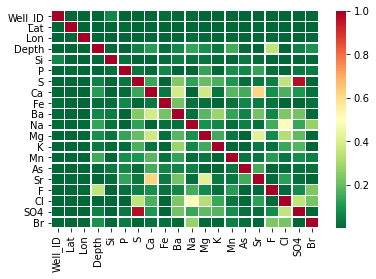

In [19]:
sns.heatmap(df_r2, cmap='RdYlGn_r', linewidths=0.5, annot=False)

Try with r-vlaues 

<AxesSubplot:>

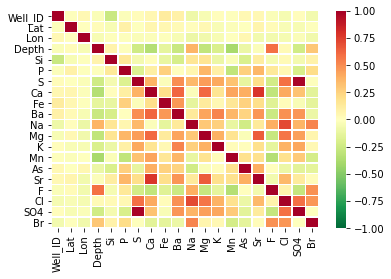

In [22]:
df=df_well_data.select_dtypes(include=np.number)
df_r2=pd.DataFrame()

for i in df:
    for j in df:
        results=stats.linregress(df_well_data[[i,j]].dropna())
        df_r2.at[j,i]=results.rvalue

sns.heatmap(df_r2, cmap='RdYlGn_r', linewidths=0.5, annot=False,vmin=-1,vmax=1)

For excel I would do r-values and only save for when p-value is less than 0.01

<AxesSubplot:>

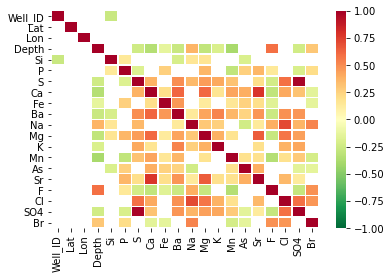

In [25]:
df=df_well_data.select_dtypes(include=np.number)
df_r2=pd.DataFrame()

for i in df:
    for j in df:
        results=stats.linregress(df_well_data[[i,j]].dropna())
        if results.pvalue<0.01:
            df_r2.at[j,i]=results.rvalue
        else:
            df_r2.at[j,i]=np.nan
df_r2.to_excel('r-values.xlsx')
sns.heatmap(df_r2, cmap='RdYlGn_r', linewidths=0.5, annot=False,vmin=-1,vmax=1)

If column names are really long remember you can use iloc to chosse a datafram by column number

In [29]:
df.iloc[:,3:7]

,Depth,Si,P,S
0,45,NaN,NaN,NaN
1,60,NaN,NaN,NaN
2,60,NaN,NaN,NaN
3,50,48084.33842,0.936358,2085.570979
4,150,NaN,NaN,NaN
...,...,...,...,...
754,160,32379.64000,0.197380,3669.430000
755,60,25561.12000,0.090570,13771.370000
756,45,31319.48000,1.162550,38.300000
757,60,30605.53000,1.556120,4168.520000
